# Generalized Linear Models (Lab 2)

### Intro and objectives


### In this lab you will learn:
1. examples of generalized linear models
2. how to fit these models in Python


## What I hope you'll get out of this lab
* The feeling that you'll "know where to start" when you need to fit generalized linear models
* Worked Examples
* How to interpret the results obtained

In [62]:
!pip install wooldridge
!pip install linearmodels
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import linearmodels as plm
import numpy as np
from scipy import stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Example. Mental Health, Stress and Socio Economic Status (SES)

#### Agresti and Finlay(1997) report data from a Florida study investigating the relationship between mental health and several explanatory variables using a random sample of 40 subjects. The outcome of interest is an index of mental impairment that incorporates measures of anxiety and depression. 

#### We will consider two predictors: a life-events score that combines the number and severity of various stressful life events, and an index of socio-economic status (SES).

In [63]:
MentalHealthDataFrame=pd.read_stata('https://github.com/thousandoaks/M4DS202/blob/main/data/mentalhealth.dta?raw=true')  


In [64]:
MentalHealthDataFrame.head(10)

,mentalImpair,lifeEvents,ses
0,17.0,46.0,84.0
1,19.0,39.0,97.0
2,20.0,27.0,24.0
3,20.0,3.0,85.0
4,20.0,10.0,15.0
5,21.0,44.0,55.0
6,21.0,37.0,78.0
7,22.0,35.0,91.0
8,22.0,78.0,60.0
9,23.0,32.0,74.0


In [65]:
MentalHealthDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mentalImpair  40 non-null     float32
 1   lifeEvents    40 non-null     float32
 2   ses           40 non-null     float32
dtypes: float32(3)
memory usage: 800.0 bytes


In [66]:
MentalHealthDataFrame.describe()

,mentalImpair,lifeEvents,ses
count,40.000000,40.000000,40.000000
mean,27.299999,44.424999,56.599998
std,5.459407,22.622757,25.278753
min,17.000000,3.000000,3.000000
25%,23.750000,32.750000,39.750000
50%,27.000000,43.000000,56.000000
75%,31.000000,55.500000,75.750000
max,41.000000,97.000000,97.000000


### We are interested in determining the impact of socio economic status on mental health. Does money buy happinness ?


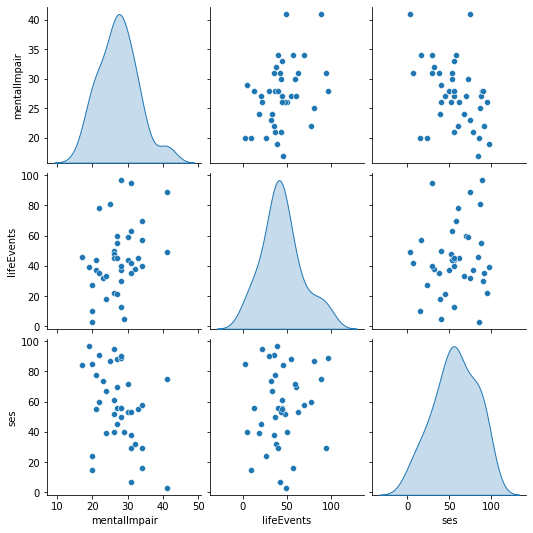

In [67]:
sns.pairplot(data=MentalHealthDataFrame,diag_kind='kde')

#### Based on the previous figure we notice that mental impairment shows a positive association with stressful life events and a negative association with SES, with no obvious evidence of non-linearities. Life events and SES show a rather weak positive relationship. Refer to the correlation matrix below.

In [68]:
# Compute the correlation matrix
corr = MentalHealthDataFrame.corr()

corr

,mentalImpair,lifeEvents,ses
mentalImpair,1.000000,0.372221,-0.398568
lifeEvents,0.372221,1.000000,0.123337
ses,-0.398568,0.123337,1.000000


## 1. The model

#### We will assume that the random variable mentaImpair follows a normal distribution with mean $µ_i$ and variance $\sigma^2$, that is:

$mentalImpair_i\sim N(\mu_i,\sigma^2)$


#### We further assume that the expected value $µ_i$ is a linear function of the two factors lifeEvents and ses, that is:

$ \mu_i=\beta_1*lifeEvents+\beta_2*ses $


## 2. Estimation of the parameters
#### In this case we rely on our old friend OLS to fit the model (in subsequent cases we will need to use MLE techniques)

In [69]:
reg = smf.ols(formula='mentalImpair ~ lifeEvents + ses ', data=MentalHealthDataFrame)

# We fit the model
results = reg.fit()

In [70]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           mentalImpair   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     9.495
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           0.000470
Time:                        12:42:05   Log-Likelihood:                -115.86
No. Observations:                  40   AIC:                             237.7
Df Residuals:                      37   BIC:                             242.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2298      2.174     12.984      0.000      23.824      32.635
lifeEvents     0.1033      0.032      3.177      0.003       0.037       0.169
ses           -0.0975      0.029     -3.351      0.002      -0.156      -0.039
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.025
Skew:                          -0.033   Prob(JB):                        0.987
Kurtosis:                       2.897   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can try adding quadratic terms

In [71]:
reg2 = smf.ols(formula='mentalImpair ~ lifeEvents + I(lifeEvents**2)+ses ', data=MentalHealthDataFrame)

# We fit the model
results2 = reg2.fit()

In [72]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           mentalImpair   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     6.169
Date:                Tue, 17 Jan 2023   Prob (F-statistic):            0.00171
Time:                        12:42:05   Log-Likelihood:                -115.85
No. Observations:                  40   AIC:                             239.7
Df Residuals:                      36   BIC:                             246.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             27.9121      3.133      8.908      0.000      21.557      34.267
lifeEvents             0.1186      0.112      1.055      0.299      -0.109       0.347
I(lifeEvents ** 2)    -0.0002      0.001     -0.143      0.887      -0.002       0.002
ses                   -0.0972      0.030     -3.288      0.002      -0.157      -0.037
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.010
Skew:                          -0.015   Prob(JB):                        0.995
Kurtosis:                       2.929   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
reg3 = smf.ols(formula='mentalImpair ~ lifeEvents + I(lifeEvents**2)+ses+ I(ses**2) ', data=MentalHealthDataFrame)

# We fit the model
results3 = reg3.fit()

In [74]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           mentalImpair   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     4.502
Date:                Tue, 17 Jan 2023   Prob (F-statistic):            0.00486
Time:                        12:42:05   Log-Likelihood:                -115.84
No. Observations:                  40   AIC:                             241.7
Df Residuals:                      35   BIC:                             250.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.1443      3.873      7.266      0.000      20.281      36.008
lifeEvents             0.1195      0.114      1.045      0.303      -0.113       0.352
I(lifeEvents ** 2)    -0.0002      0.001     -0.148      0.883      -0.002       0.002
ses                   -0.1093      0.120     -0.912      0.368      -0.353       0.134
I(ses ** 2)            0.0001      0.001      0.105      0.917      -0.002       0.002
==============================================================================
Omnibus:                        0.116   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.016
Skew:                          -0.025   Prob(JB):                        0.992
Kurtosis:                       2.918   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The quadratic terms are not statistically significant, thus we opt for the first alternative with no quadratic elemennts. 



In [75]:
reg = smf.ols(formula='mentalImpair ~ lifeEvents + ses ', data=MentalHealthDataFrame)

# We fit the model
results = reg.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           mentalImpair   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     9.495
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           0.000470
Time:                        12:42:05   Log-Likelihood:                -115.86
No. Observations:                  40   AIC:                             237.7
Df Residuals:                      37   BIC:                             242.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2298      2.174     12.984      0.000      23.824      32.635
lifeEvents     0.1033      0.032      3.177      0.003       0.037       0.169
ses           -0.0975      0.029     -3.351      0.002      -0.156      -0.039
==============================================================================
Omnibus:                        0.098   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.025
Skew:                          -0.033   Prob(JB):                        0.987
Kurtosis:                       2.897   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The final model is therefore:


$ \mu_i=28.23+0.1033*lifeEvents-0.0975*ses $

## 3. Model interpretation:

#### We find highly significant net effects of both SES and life events, as evidenced by t-statistics of -3.35 (p-value:0.002) and 3.17 (p-value:0.003) respectively. 

#### The mean of mentalImpair decreases 0.0975 points for each additional point of improvement in ses (socio economic status).

#### The mean of mentalImpair increases  0.1033 points for each additional point of lifeEvents (traumatic episodes).


### Based on the previous we find a positive impact of socio economic status on mental health.

### A note of caution however: beware of establishing strong causality between socio economic status and mental health. It might be the case that lower levels of mental health drive socio economic status. 

### Establishing strong causality is hard, in this case we would need a larger dataset, ideally a panel datas observing the evolution of subjects accross time. Another alternative to infer causation is through randomized controlled trials.

## 4. Regression Diagnostics

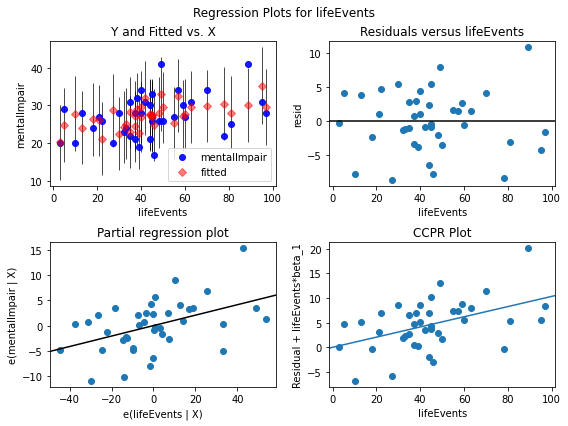

In [76]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'lifeEvents', fig=fig)
plt.show()

#### From the top right figure, We observe a non-constant spread of the residuals: a tendency for more dispersed residuals for large $y_i$. It would be advisable to tranform the response and the independent factors  (e.g taking logs or standarization).

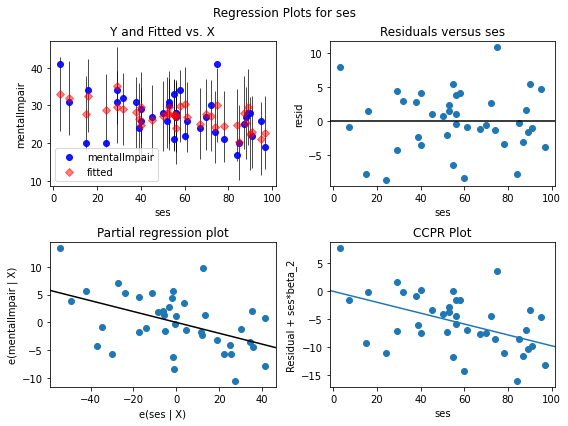

In [77]:
fig = plt.figure(figsize=(8, 6))
sm.graphics.plot_regress_exog(results, 'ses', fig=fig)
plt.show()

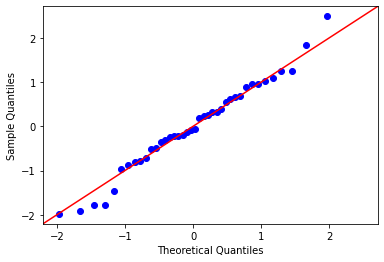

In [78]:
residuals = results.resid # residuals
fig = sm.qqplot(residuals,stats.t, fit=True, line="45")
plt.show()

#### Based on the previous Q-Q plot we conclude that we have no evidence against the assumption of normally distributed residuals.

#### We can further test the normality assumption by way of the Jarque-Bera test. The Jarque-Bera test statistic tests the null that the data is normally distributed against an alternative that the data follow some other distribution. 

#### The Jarque-Bera test statistic is always positive, and if it is not close to zero, it shows that the sample data do not have a normal distribution. Based on the results below (J-B test: 0.025) we find no evidence against the normality assumption of residuals.

In [79]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 0.02520294422725863),
 ('Chi^2 two-tail prob.', 0.9874775939712618),
 ('Skew', -0.03338396765324425),
 ('Kurtosis', 2.89673427794634)]